# Problem Statement

During the year 2018, the Canadian Goverment received an appeal that prisioners were being wrongfully convicted and the issue gained mass amounts of traction. Thus, the government appointed a team to look into the issue by conducting lie detector tests on 1372 prisoners across various states and provinces of the country. The team has done the basic checks and accordingly given the Variance, Skewness, Kurtosis and Entropy of the Responses obtained by the lie detector test. These are predictors for the Dependent Variable which states whether the response being considered belongs to a liar or not a liar. (These variables are to be treated as Independent Variables only, and no variance, skewness, kurtosis, entropy needs to be calculated for the analysis.)

## Data Dictionary

Data Dictionary
The dataset consists of the following variables:<br>X1 : Prisoner ID
<br>X2 : Variance of responses obtained.
<br>X3 : Skewness of responses obtained.
<br>X4 : Kurtosis of responses obtained.
<br>X5 : Entropy of responses.
<br>X6 : Class of person, 0 means the person is not a liar, and 1 means that the person is a liar.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [23]:
adult_data=pd.read_csv("liedetector.csv")

### EDA

In [24]:
adult_data.head()

,X1,X2,X3,X4,X5,X6
0,P_001,3.6216,8.6661,-2.8073,-0.44699,0
1,P_002,4.5459,8.1674,-2.4586,-1.46210,0
2,P_003,3.8660,-2.6383,1.9242,0.10645,0
3,P_004,3.4566,9.5228,-4.0112,-3.59440,0
4,P_005,0.2323,-4.4552,4.5718,-0.98880,0


In [30]:
adult_data = adult_data.drop(['X1'], axis = 1) 

In [31]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X2      1372 non-null   float64
 1   X3      1372 non-null   float64
 2   X4      1372 non-null   float64
 3   X5      1372 non-null   float64
 4   X6      1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


There are no missing values. 6 variables are numeric and remaining categorical. Categorical variables are not in encoded format

### Check for duplicate data

In [32]:
dups = adult_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(adult_data.shape)

Number of duplicate rows = 18
(1372, 5)


There are 24 duplicates that needs to be removed

In [33]:
adult_data.drop_duplicates(inplace=True) 

In [34]:
dups = adult_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(adult_data.shape)

Number of duplicate rows = 0
(1354, 5)


### Geting unique counts of all Objects

In [35]:
adult_data.salary.value_counts(normalize=True)

AttributeError: 'DataFrame' object has no attribute 'salary'

In [36]:
for feature in adult_data.columns: 
    if adult_data[feature].dtype == 'object': 
        print(feature)
        print(adult_data[feature].value_counts())
        print('\n')
        

workclass, occupation,native-country has ?  
Since, high number of cases have ?, we will convert them into a new level

In [37]:
# Replace ? to new Unk category
adult_data.workclass=adult_data.workclass.str.replace('?', 'Unk')
adult_data.occupation = adult_data.occupation.str.replace('?', 'Unk')
adult_data['native-country'] = adult_data['native-country'].str.replace('?', 'Unk')

AttributeError: 'DataFrame' object has no attribute 'workclass'

In [38]:
adult_data.describe()

,X2,X3,X4,X5,X6
count,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000
mean,0.442635,1.915354,1.408645,-1.175747,0.411374
std,2.857947,5.870388,4.325187,2.090713,0.492265
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.784025,-1.669400,-1.548200,-2.405700,0.000000
50%,0.505190,2.334150,0.605495,-0.580830,0.000000
75%,2.846500,6.800675,3.226800,0.400955,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [39]:
adult_data.columns

Index(['X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

### Checking the spread of the data using boxplot for the continuous variables.

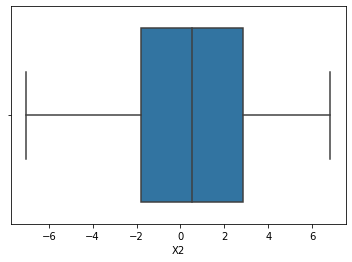

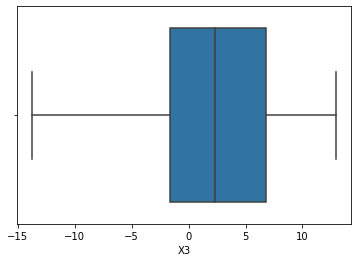

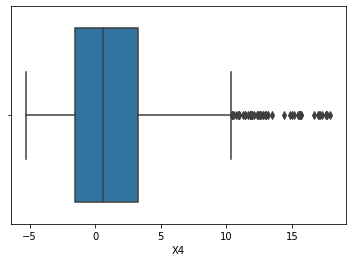

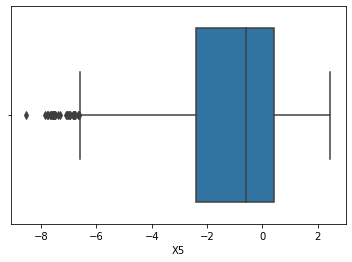

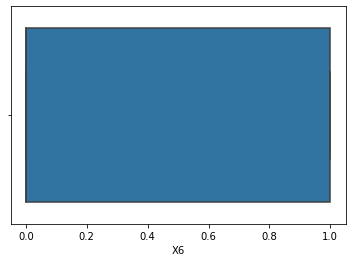

In [40]:
cols = ['X2', 'X3', 'X4', 'X5', 'X6']
for i in cols:
    sns.boxplot(adult_data[i],whis=1.5)
    plt.show();

### Treating the outliers.
###### We can treat Outliers with the following code. We will treat the outliers for the 'Age' variable only.

In [41]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [42]:
lr,ur=remove_outlier(adult_data['age'])
print('Lower Range :',lr,'\nUpper Range :',ur)
adult_data['age']=np.where(adult_data['age']>ur,ur,adult_data['age'])
adult_data['age']=np.where(adult_data['age']<lr,lr,adult_data['age'])

KeyError: 'age'

In [43]:
## This is a loop to treat outliers for all the non-'object' type varible

# for column in adult_data.columns:
#     if adult_data[column].dtype != 'object': 
#         lr,ur=remove_outlier(adult_data[column])
#         adult_data[column]=np.where(adult_data[column]>ur,ur,adult_data[column])
#         adult_data[column]=np.where(adult_data[column]<lr,lr,adult_data[column])

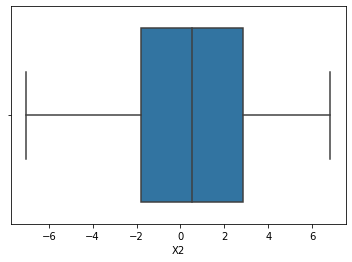

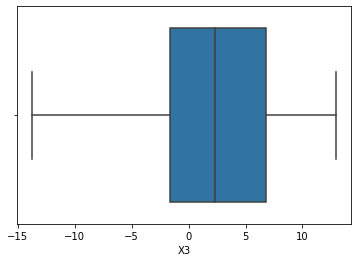

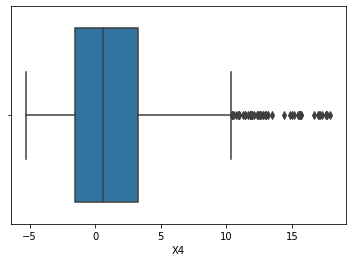

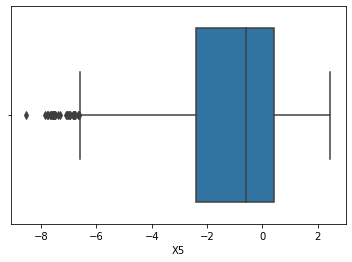

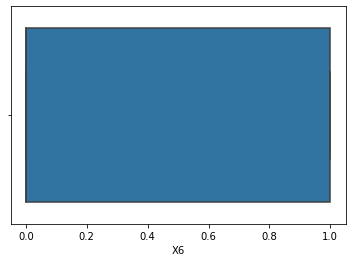

In [45]:
cols = ['X2', 'X3', 'X4', 'X5', 'X6']
for i in cols:
    sns.boxplot(adult_data[i])
    plt.show();

### Checking for Correlations.

In [46]:
adult_data.corr()

,X2,X3,X4,X5,X6
X2,1.000000,0.270452,-0.385448,0.274880,-0.511592
X3,0.270452,1.000000,-0.785905,-0.522178,-0.303559
X4,-0.385448,-0.785905,1.000000,0.313572,0.093187
X5,0.274880,-0.522178,0.313572,1.000000,-0.016648
X6,-0.511592,-0.303559,0.093187,-0.016648,1.000000


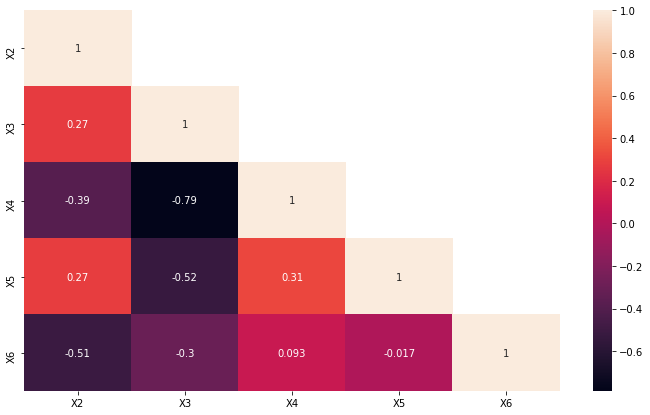

In [47]:
plt.figure(figsize=(12,7))
sns.heatmap(adult_data.corr(), annot=True,mask=np.triu(adult_data.corr(),+1));

In [48]:
adult_data.describe()

,X2,X3,X4,X5,X6
count,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000
mean,0.442635,1.915354,1.408645,-1.175747,0.411374
std,2.857947,5.870388,4.325187,2.090713,0.492265
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.784025,-1.669400,-1.548200,-2.405700,0.000000
50%,0.505190,2.334150,0.605495,-0.580830,0.000000
75%,2.846500,6.800675,3.226800,0.400955,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


There is hardly any correlation between the numeric variables

KeyError: 'salary'

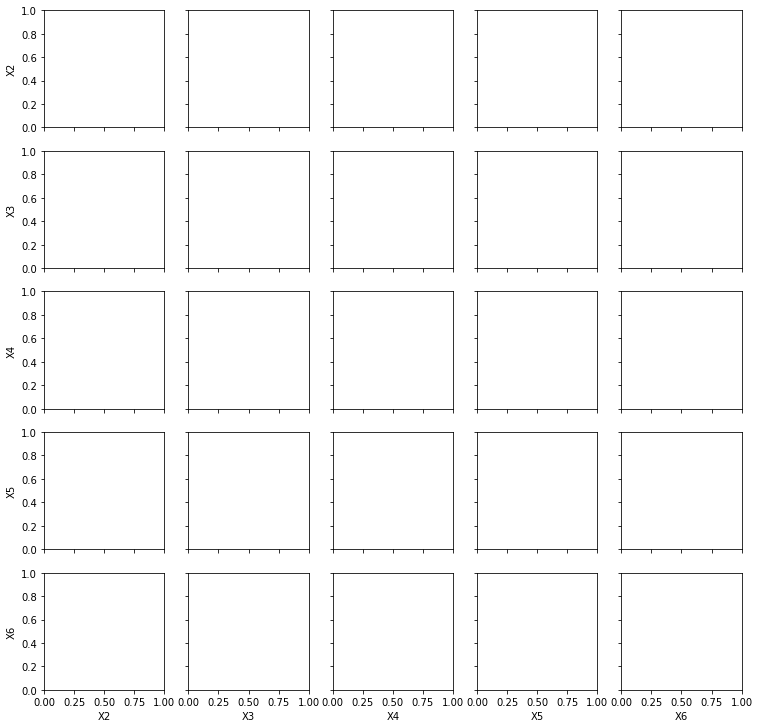

In [49]:
# Pairplot using sns
sns.pairplot(adult_data ,diag_kind='hist' ,hue='salary');

### Converting all objects to categorical codes

In [21]:
for feature in adult_data.columns: 
    if adult_data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(adult_data[feature].unique()))
        print(pd.Categorical(adult_data[feature].unique()).codes)
        adult_data[feature] = pd.Categorical(adult_data[feature]).codes



feature: workclass
[State-gov, Self-emp-not-inc, Private, Federal-gov, Local-gov, Unk, Self-emp-inc, Without-pay, Never-worked]
Categories (9, object): [Federal-gov, Local-gov, Never-worked, Private, ..., Self-emp-not-inc, State-gov, Unk, Without-pay]
[6 5 3 0 1 7 4 8 2]


feature: education
[Bachelors, HS-grad, 11th, Masters, 9th, ..., 5th-6th, 10th, 1st-4th, Preschool, 12th]
Length: 16
Categories (16, object): [10th, 11th, 12th, 1st-4th, ..., Masters, Preschool, Prof-school, Some-college]
[ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2]


feature: marrital status
[Never-married, Married-civ-spouse, Divorced, Married-spouse-absent, Separated, Married-AF-spouse, Widowed]
Categories (7, object): [Divorced, Married-AF-spouse, Married-civ-spouse, Married-spouse-absent, Never-married, Separated, Widowed]
[4 2 0 3 5 1 6]


feature: occupation
[Adm-clerical, Exec-managerial, Handlers-cleaners, Prof-specialty, Other-service, ..., Tech-support, Unk, Protective-serv, Armed-Forces, Priv-house

In [50]:
adult_data.head()

,X2,X3,X4,X5,X6
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0
3,3.4566,9.5228,-4.0112,-3.59440,0
4,0.2323,-4.4552,4.5718,-0.98880,0


### Train Test Split

In [51]:
# Copy all the predictor variables into X dataframe
X = adult_data.drop('X6', axis=1)

# Copy target into the y dataframe. 
y = adult_data['X6']

In [52]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [53]:
y_train.value_counts(1)

0    0.588173
1    0.411827
Name: X6, dtype: float64

In [54]:
y_test.value_counts(1)

0    0.589681
1    0.410319
Name: X6, dtype: float64

### Logistic Regression Model

We are making some adjustments to the parameters in the Logistic Regression Class to get a better accuracy. Details of which can be found out on the site scikit-learn mentioned below

<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>scikit-learn</a>

>Argument=solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem.

>For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

>For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.

>‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty

>‘liblinear’ and ‘saga’ also handle L1 penalty

>‘saga’ also supports ‘elasticnet’ penalty

>‘liblinear’ does not support setting penalty='none'

>Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

>New in version 0.17: Stochastic Average Gradient descent solver.

>New in version 0.19: SAGA solver.

>Changed in version 0.22: The default solver changed from ‘liblinear’ to ‘lbfgs’ in 0.22.

<a href='https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451'> Article on Solvers</a>



In [55]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.5s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=2, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001,
                   verbose=True, warm_start=False)

### Predicting on Training and Test dataset

In [56]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### Getting the Predicted Classes and Probs

In [57]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.902207,0.097793
1,0.788238,0.211762
2,0.917784,0.082216
3,0.172250,0.827750
4,0.142871,0.857129


## Model Evaluation

In [58]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.8542766631467793

### AUC and ROC for the training data

AUC: 0.854


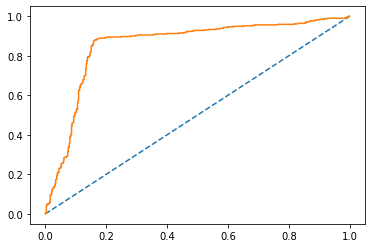

In [59]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [60]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8378378378378378

### AUC and ROC for the test data

AUC: 0.854


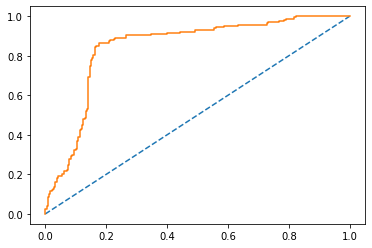

In [61]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data

In [62]:
confusion_matrix(y_train, ytrain_predict)

array([[467,  90],
       [ 48, 342]], dtype=int64)

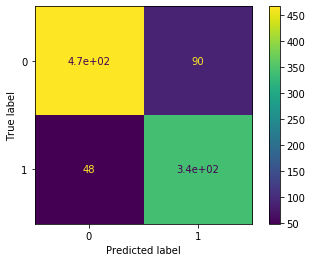

In [63]:
plot_confusion_matrix(model,X_train,y_train);

In [64]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       557
           1       0.79      0.88      0.83       390

    accuracy                           0.85       947
   macro avg       0.85      0.86      0.85       947
weighted avg       0.86      0.85      0.86       947



### Confusion Matrix for test data

In [65]:
confusion_matrix(y_test, ytest_predict)

array([[200,  40],
       [ 26, 141]], dtype=int64)

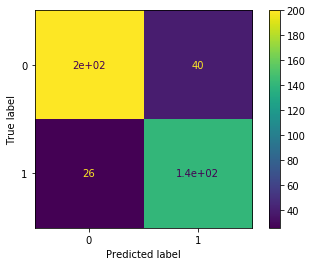

In [66]:
plot_confusion_matrix(model,X_test,y_test);

In [67]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       240
           1       0.78      0.84      0.81       167

    accuracy                           0.84       407
   macro avg       0.83      0.84      0.83       407
weighted avg       0.84      0.84      0.84       407



## Applying GridSearchCV for Logistic Regression

In [68]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [69]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [70]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [71]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=2, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [72]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=2, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)


In [73]:
best_model = grid_search.best_estimator_

In [74]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [75]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.901798,0.098202
1,0.788023,0.211977
2,0.917471,0.082529
3,0.172637,0.827363
4,0.143235,0.856765


              precision    recall  f1-score   support

           0       0.91      0.84      0.87       557
           1       0.79      0.88      0.83       390

    accuracy                           0.85       947
   macro avg       0.85      0.86      0.85       947
weighted avg       0.86      0.85      0.86       947
 



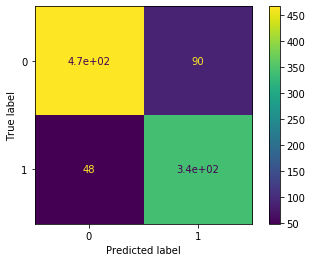

In [76]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       240
           1       0.78      0.84      0.81       167

    accuracy                           0.84       407
   macro avg       0.83      0.84      0.83       407
weighted avg       0.84      0.84      0.84       407
 



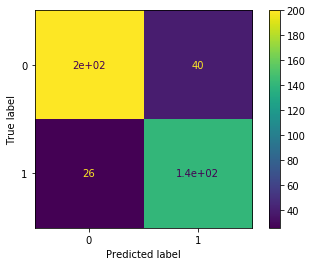

In [77]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

You can select other parameters to perform GridSearchCV and try optimize the desired parameter.

Note: Alternatively, one hot encoding can also be done instead of label encoding on categorical variables before building the logistic regression model. Do play around with these techniques using one hot encoding as well.

# Running in Google Colab
Importing jupyter notebook
1. Login to Google
2. Go to drive.google.com
3. Upload jupyter notebook file into the drive
4. double click it, or right click -&gt; open with -&gt; google colaboratory
Alternatively,
1. Login to Google
2. Go to https://colab.research.google.com/notebooks/intro.ipynb#recent=true
3. Upload the jupyter notebook

Loading dataset into colab
## Use the below code to load the dataset
from google.colab import files

uploaded = files.upload() # upload file here from local

import io

df2 = pd.read_csv(io.BytesIO(uploaded[&#39;Filename.csv&#39;])) #give the filename in quotes

Go to Runtime > change Runtime type > check if it points to Python

                                                    Happy Learning